# ***Project Details***

***Title***: Guided Project

***Due Date***: 22 April 2025

***Contributors***: 
- Hayley Treutens (578003)
- Grace Kangausaru (601359)
- Gideon Nico Vermeulen (601281)
- Petrus Human (577842)

***GitHub Link***: 

===========================================================================================================================================
## ***Grade Class Prediction for BrightPath Academy***

*This project is a comprehensive study conducted under BrightPath Academy, aimed at building a predictive model to identify which student-related features most significantly influence their academic grade classification. The primary goal of this project is to accurately predict a student's grade class based on input attributes.*

*The project uses a dataset adapted for academic performance analysis, originally titled “Student performance data”. This dataset will be repurposed and undergo a series of detailed data analysis and preprocessing steps. These include dataset analysis, univariate and bivariate analysis, handling missing data, removing duplicates, and addressing outliers.*

*Two predictive models will be developed and evaluated. Feature importance will be analyzed to understand the key drivers behind academic outcomes. Both models will be saved as pickle files for future reuse, with the second model undergoing cross-validation to enhance its reliability and performance.*

*Once validated, the most accurate model will be deployed using a web application built with DASH, offering an interactive interface for predicting student grade classifications. This web tool aims to provide educators and academic advisors with valuable insights to support student success and targeted interventions.*

*This project marks a significant step forward in integrating machine learning within educational contexts, helping BrightPath Academy and similar institutions leverage data for improved academic decision-making and student support strategies.*


***This notebook will take the following structure:***
    
    1. Prepare Data (Data Analysis)
        A. Dataset Analysis
        B. Univariate Analysis
        C. Bi-variate Analysis
        
    2. Hypotheses
    
    3. Preprocess Data (Data Cleaning)
        A. Handling missing values
        B. Removing duplicates
        C. Data Type Conversion
        D. Outlier value Handling
        E. Remove Irrelevant Features
        
    4. Split Dataset
    
    5. Model 1
        A. Build Model
        B. Predictions of the Model
        C. Evaluation Metrics of the Model
        D. Feature Importance from the Model
        E. Cross Validation of Models
        E. Model Choice

    6. Improve Model 1
        A. Build Model
        B. Predictions of the Model
        C. Cross Validation With Baseline Models
        D. Create Pickle File

    7. Feature Engineering
    
    8. Model 2
        A. Build Model
        B. Predictions of the Model
        C. Feature Importance from the Model
        D. Create Pickle File
        
    9. Cross-Validate Models
    
    10. Web Application

===========================================================================================================================================

*Before any coding can take place, certain libraries in python need to be imported to perform different functions and make various features available
for use*

In [15]:
#Import libraries
import csv
import pandas as pd
import numpy as np

#Visualization 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#Predictions
import pickle

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, confusion_matrix, classification_report
from scipy import stats


#Web application
# import dash
# from dash import html, dcc
# import plotly.graph_objs as go
# from dash.dependencies import Input, Output, State

#Supress warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## ***1. Prepare Data***
*The csv file named Student_performance_data is read so that the unclean data contained in this file can be analysed.*

In [9]:
# DataFrame from csv file
path = './Student_performance_data .csv'
raw_data = pd.read_csv(path)
raw_data_copy = raw_data
raw_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### ***A. Dataset Analysis***
#### ***Dataset Features***
- *Feature variable - Independent variables that are not changed by other variables (Denoted by X in ML)*
- *Target variable - Dependent variables that are to be predicted and depend on other variables (Dentoed by Y in ML)*

In [10]:
#Analyse columns and rows
raw_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


***Insight Gained***
- *Feature names are consistent and do not require and data processing for standardisation.*
- *The dataset has 14 feature variables.*
- *And a single target variable:  GradeClass.*
- *This variable will be the predicted variable of the models.*

#### ***Dataset Datatypes***

*Features can have different datatypes, such as numerical, categorical or ordinal. Knowing the datatype of each feature is important because it determines what kind of statistical analysis or data processing is required.*

In [11]:
print(f'Raw data types: \n{raw_data_copy.dtypes}')

Raw data types: 
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


***Insight Gained***:
- *All features either have a datatype of an integer or floating point*
- *This indicates that no regirous conversions are need except possibly converting the GradeClass to an integer to better suit its category nature*
- *This conversion can be fixed in the data processing section.*

#### ***Data Shape***

*Knowing the number of rows in the dataset can provide a better understanding of the volume of the data available.*

In [12]:
print(f'The data has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns')

The data has 2392 rows and 15 columns


***Insight Gained***
- *Raw data rows: 2392*
- *Raw data columns: 15*

#### ***Data Statistics***
*Knowing some of the datasets's feature statistics such as mean, count, minimum and maximum values can provide insight into what data the data looks like.*

In [13]:
raw_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


#### ***Verify Feature Value Range***
*BrightPath Academy provide a list of the valid ranges and category values that all their data should adhere to. By identifying what features have invalid data can help provide insight into what needs to be cleaned in the data processing section.*

In [14]:
# Check if StudentID values are between 1001 and 3392 (inclusive)
in_range = raw_data['StudentID'].between(1001, 3392).all()
print(in_range)  

True


In [15]:
#Age range (between 15-18)
raw_data['Age'].value_counts()

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64

In [16]:
#Gender range (male= 0 , female = 1)
raw_data['Gender'].value_counts()

Gender
1    1222
0    1170
Name: count, dtype: int64

In [17]:
#Ethnicity range (caucasian = 0, african american = 1, asian = 2, other = 3)
raw_data['Ethnicity'].value_counts()

Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64

In [18]:
#Parental Education range (none = 0, high school = 1, some college =2, bachelor's = 3, higher study = 4)
raw_data['ParentalEducation'].value_counts()

ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64

In [19]:
# Check if StudyTimeWeekly values are between 0 and 20 (inclusive)
in_range = raw_data['StudyTimeWeekly'].between(0, 20).all()
print(in_range)

True


In [20]:
# Check if Absences values are between 0 and 30 (inclusive)
in_range = raw_data['Absences'].between(0, 30).all()
print(in_range)

True


In [21]:
#Tutoring range (no = 0, yes = 1)
raw_data['Tutoring'].value_counts()

Tutoring
0    1671
1     721
Name: count, dtype: int64

In [22]:
#Parental Support range (none = 0, low = 1, moderate =2, high = 3, very high = 4)
raw_data['ParentalSupport'].value_counts()

ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64

In [23]:
#Extracurricular range (no = 0, yes = 1)
raw_data['Extracurricular'].value_counts()

Extracurricular
0    1475
1     917
Name: count, dtype: int64

In [24]:
#Sports range (no = 0, yes = 1)
raw_data['Sports'].value_counts()

Sports
0    1666
1     726
Name: count, dtype: int64

In [25]:
#Music range (no = 0, yes = 1)
raw_data['Music'].value_counts()

Music
0    1921
1     471
Name: count, dtype: int64

In [26]:
#Volunteering range (no = 0, yes = 1)
raw_data['Volunteering'].value_counts()

Volunteering
0    2016
1     376
Name: count, dtype: int64

In [27]:
# Check if GPA values are between 0.0 and 4.0 (inclusive)
in_range = raw_data['GPA'].between(0.0, 4.0).all()
print(in_range)

True


In [28]:
# Identify the number of GPA values not in the average GPA range (2.0 - 4.0)
in_range = raw_data['GPA'].between(2.0, 4.0).value_counts()
print(in_range)

GPA
False    1274
True     1118
Name: count, dtype: int64


In [29]:
#GradeClass range (A = 0, B = 1, C = 2, D = 3 F = 4)
raw_data['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

***Insight Gained***
- *All StudentID values are valid  (Range: 1001-3392)*
- *All Age values are valid (Range: 15-18)*
- *All Gender values are valid (Categories: male = 0 and female = 1)*
- *All Ethnicity values are valid (Categories: caucasian = 0 , african american = 1, asian = 2, other = 3)*
- *All ParentalEducation values are valid (Categories: none = 0 , high school = 1, some college = 2, bachelor's = 3, higher study = 4)*
- *All StudeyTimeWeekly values are valid (Range: 0-20)*
- *All Absence values are valid (Range: 0-30)*
- *All Tutoring values are valid (Categories: no = 0 and yes = 1)*
- *All ParentalSupport values are valid (Categories: none = 0 , low = 1, moderate = 2, high = 3, very high = 4)*
- *All Extracurricular values are valid (Categories: no = 0 and yes = 1)*
- *All Sports values are valid (Categories: no = 0 and yes = 1)*
- *All Music values are valid (Categories: no = 0 and yes = 1)*
- *All Volunteering values are valid (Categories: no = 0 and yes = 1)*
- *All GPA values are valid (Range: 0.0-4.0)*
- *All GradeClass values are valid (Categories: A = 0 , B = 1, C = 2, D = 3, E = 4)*

*Additionally, we can see that based on the schools average GPA range (2.0 - 4.0) we identified:*
- *1118 students fall into the range*
- *1274 student are below the average range*

This provides insight about the number of students falling short of the school average that could be considered part of the at-risk student group. 

### ***A. Univariate Analysis***
*Univariate analysis is the process of analysing individual variables one at a time. This is the most basic type of data analysis to find patterns in the data.*

#### ***Independent Features***
*These feature include:*

***Irrelevant (Will not be analysed as it is a unique feature)***
- *StudentID*

***Numerical***
- *Age*
- *StudyTimeWeekly*
- *Absences*
- *GPA*

***Categorical (Binary)***
- *Gender*
- *Tutoring*
- *Extracurricular*
- *Sports*
- *Music*
- *Volunteering*

***Categorical (ordinal)***
- *Ethnicity*
- *ParentalEducation*
- *ParentalSupport*




***Independent (Numeric)***

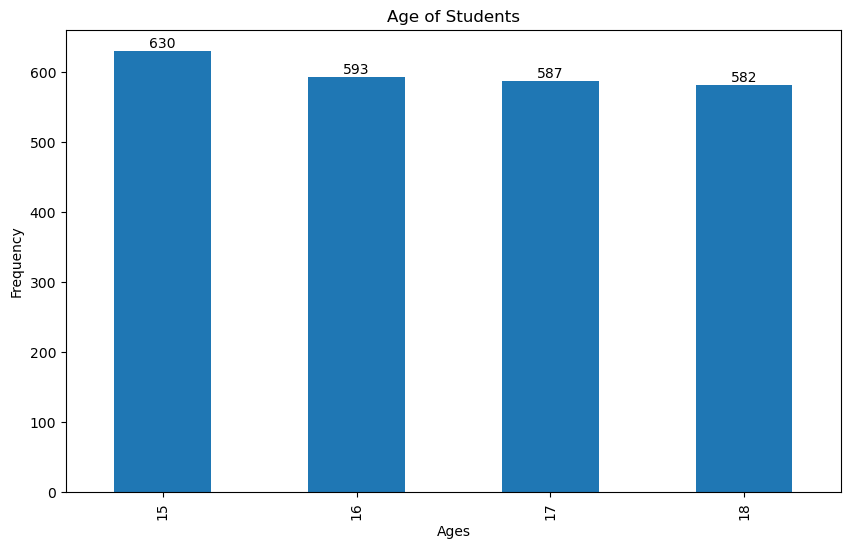

In [30]:
#Age
plt.figure(figsize=(10, 6))
count = raw_data_copy['Age'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Age of Students', 
    xlabel = 'Ages',
    ylabel = 'Frequency'
)

#Add rounded off values for each bar
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 30)  
plt.show()

***Insight Gained***
- *630 students are 15 years old*
- *593 students are 16 years old*
- *587 students are 17 years old*
- *582 students are 18 years old*

*This even distribution suggests that there is no significant age group dominance in the dataset. The data does not display any extreme outliers or noticeable skewness.This lack of skew implies that age may not be a strong predictor of GradeClass.*

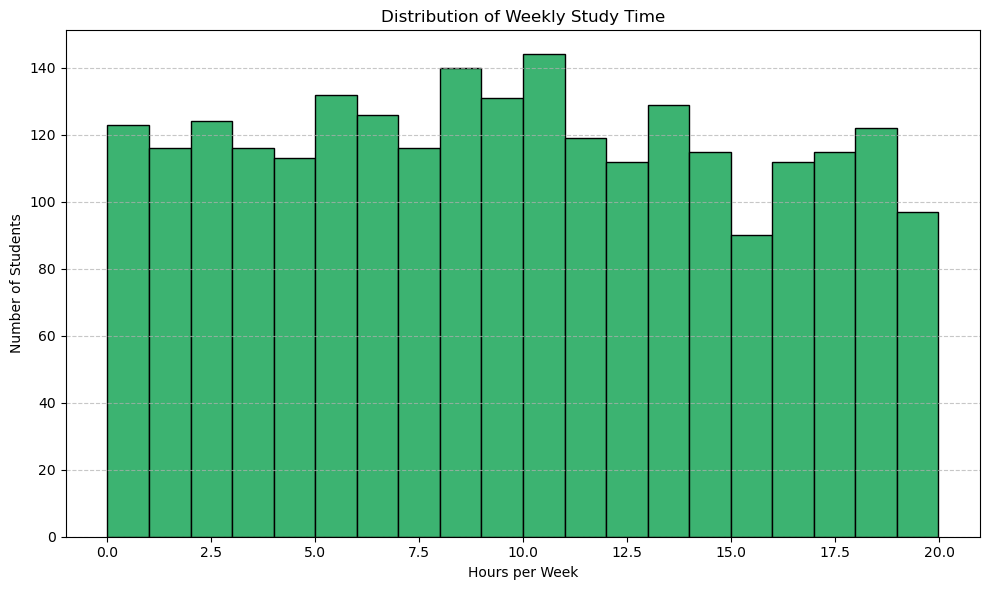

In [31]:
#StudyTimeWeekly
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(raw_data_copy['StudyTimeWeekly'], bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Weekly Study Time')
plt.xlabel('Hours per Week')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *Even distribution*
- *Frequency is unimodal*
- *No noticable skewness (symmertrical)*
- *No extreme peaks (possibly no outliers)*

*Since there's no single standout study time it may indicate that other factors like parental support, tutoring, or extracurriculars might be influencing GradeClass more significantly than just raw hours studied.

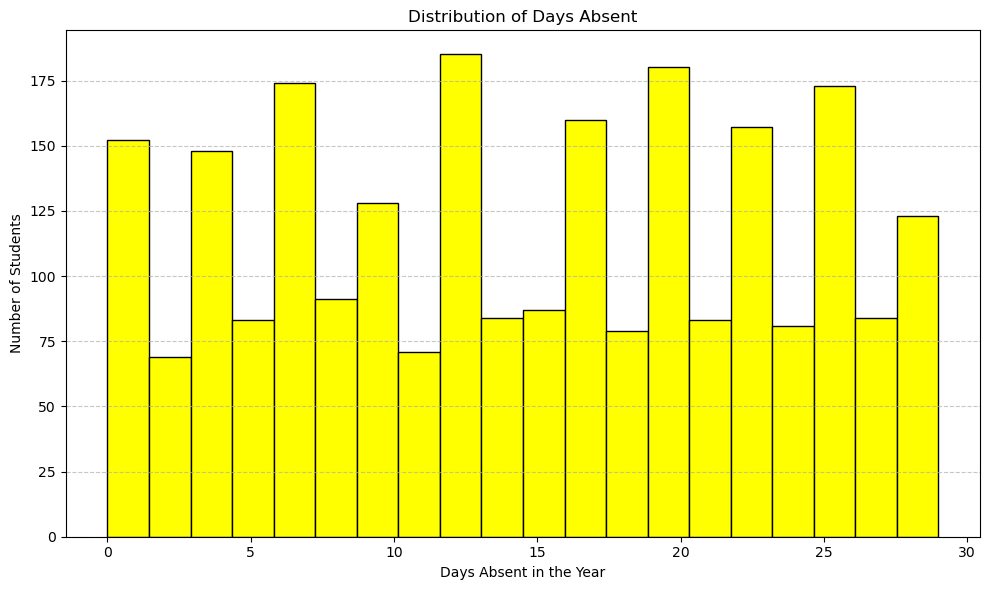

In [32]:
#StudyTimeWeekly
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(raw_data_copy['Absences'], bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of Days Absent')
plt.xlabel('Days Absent in the Year')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *Somewhat even distribution*
- *Frequency is multi-modal*
- *No noticable skewness (symmertrical)*
- *Spread is variable*
- *No extreme peaks (possibly no outliers)*

*The diverse range might impact academic performance inconsistently therefore exploring if higher absenteeism correlates with lower GradeClass or performance metrics.*

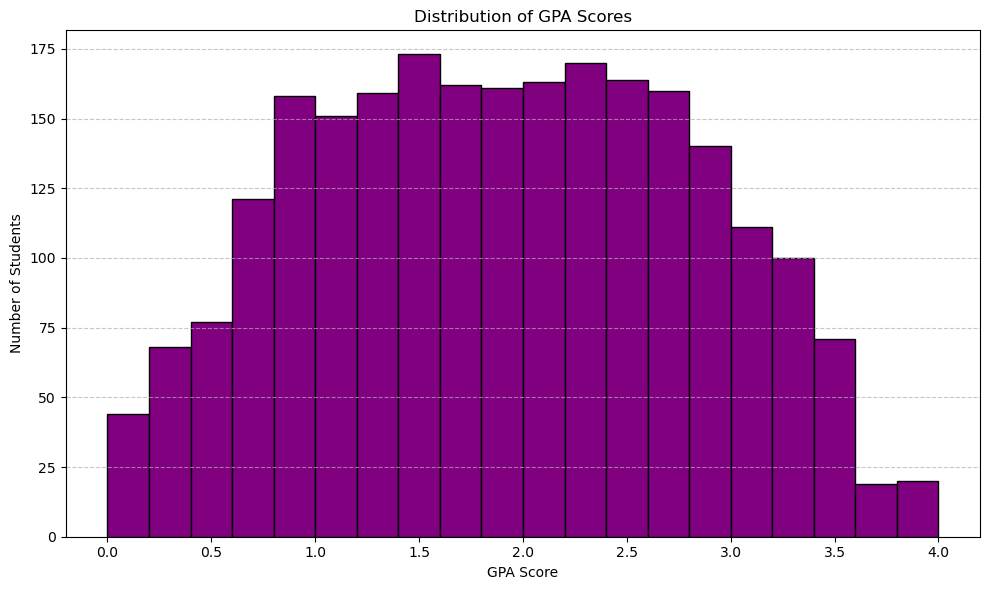

In [33]:
#GPA
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(raw_data_copy['GPA'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of GPA Scores')
plt.xlabel('GPA Score')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *Bell-shaped curve that indicates a roughly normal distribution*
- *Frequency is unimodal*
- *Slight negative skewness*

*The academic performance seems to cluster around average values (1.0 - 2.5), with fewer high-achieving students. This might point to factors like attendance, parental support or tutoring affecting student GradeClass.*

***Independent (Binary)***

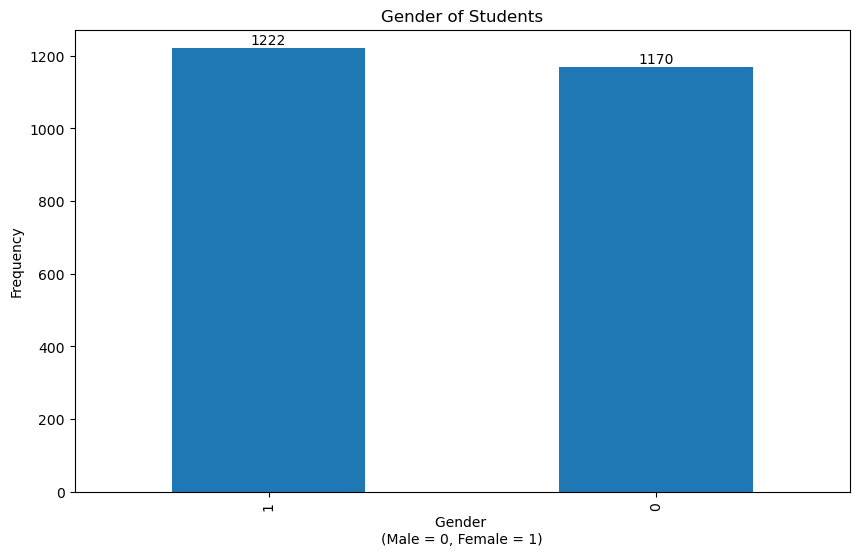

In [34]:
#Gender
plt.figure(figsize=(10, 6))
count = raw_data_copy['Gender'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Gender of Students', 
    xlabel = 'Gender \n(Male = 0, Female = 1)',
    ylabel = 'Frequency'
)

#Add rounded off values for each bar
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 50) 
plt.show()

***Insight Gained***

*The graph shows:*
- *1170 students are Male (0)*
- *1222 students are Female (1)*

*This almost even split indicates that the dataset is not biased toward a particular gender. Since the difference in counts is relatively small, it's reasonable to assume that gender may not play a dominant role in determining GradeClass. However, it’s still valuable to explore potential subtle performance trends between genders using bivariate analysis later on.*

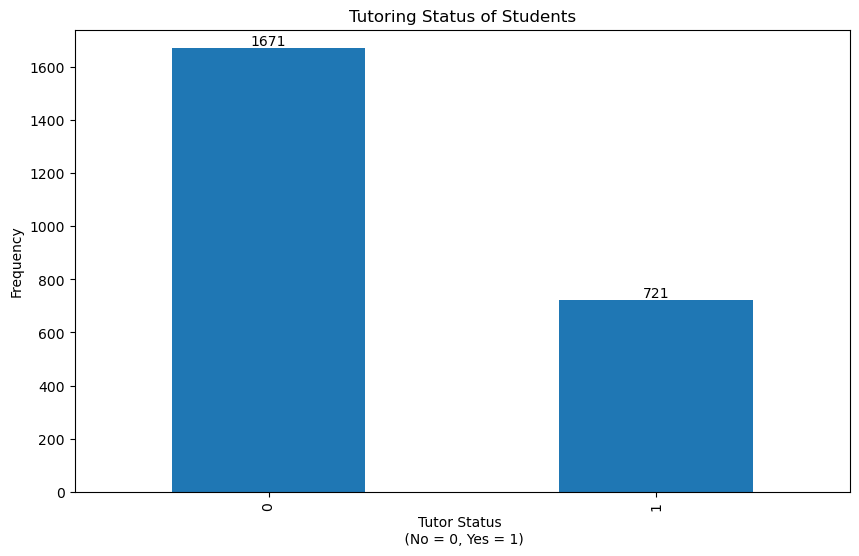

In [35]:
#Tutoring
plt.figure(figsize=(10, 6))
count = raw_data_copy['Tutoring'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Tutoring Status of Students', 
    xlabel = 'Tutor Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

#Add rounded off values for each bar
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *721 students did not recieve tutoring (0)*
- *1671 students recieved tutoring (1)*

*The relatively lower count of non-tutored students might indicate that lack of tutoring could be associated with lower academic performance, potentially resulting in a lower GradeClass.This distribution pattern implies that tutoring may play an important role in student outcomes and could be a strong predictor in the model. A bivariate analysis comparing Tutoring and GradeClass would be helpful to explore this relationship further.*

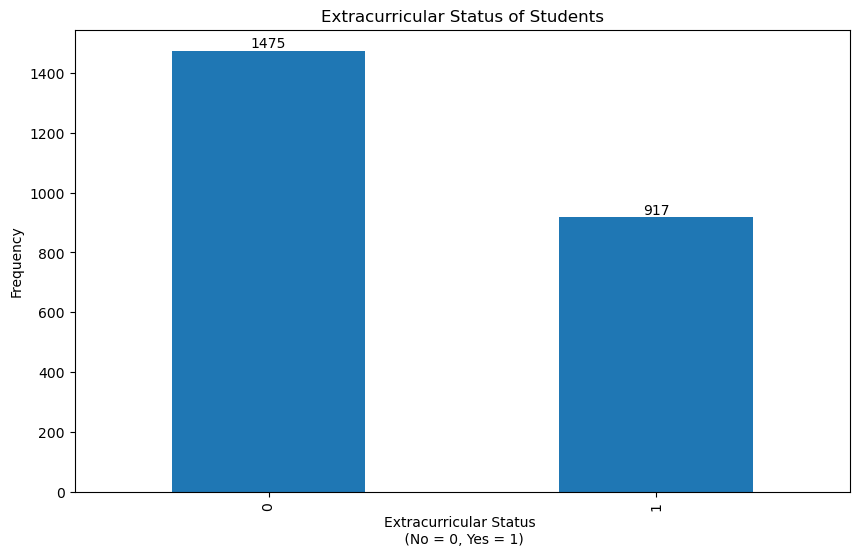

In [36]:
#Extracurricular
plt.figure(figsize=(10, 6))
count = raw_data_copy['Extracurricular'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Extracurricular Status of Students', 
    xlabel = 'Extracurricular Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *1475 students don't have any extracurriculars (0)*
- *917 students have extracurriculars (1)*

*This suggests that fewer students are involved in extracurriculars. The distribution could imply that students not engaged in extracurriculars might be focusing more on academics, or alternatively, that those involved in activities may have better time management and support systems—potentially affecting their GradeClass. However, without further analysis, it's unclear whether participation improves or reduces performance. A bivariate analysis between Extracurricular and GradeClass is needed to determine the nature of the relationship and whether it has a positive, negative, or negligible effect on academic outcomes.*

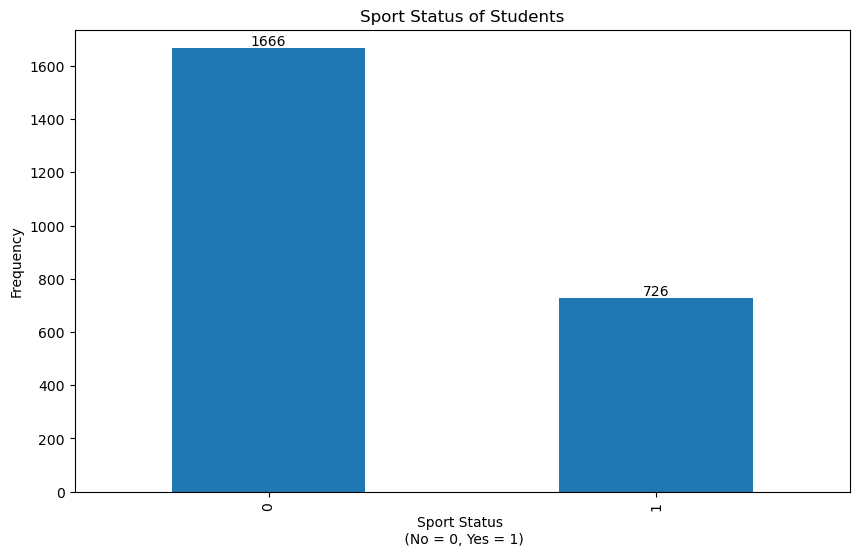

In [37]:
#Sports
plt.figure(figsize=(10, 6))
count = raw_data_copy['Sports'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Sport Status of Students', 
    xlabel = 'Sport Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *1666 students do not do sports (0)*
- *726 students do sports (1)*

*This indicates a significant imbalance between students who participate in sports and those who don't. The lower participation in sports could suggest that students may be prioritizing academics, or it could mean that sports participants have less time for study, which may affect their GradeClass performance either positively (due to structure and discipline) or negatively (due to time constraints).To draw accurate conclusions, it would be beneficial to perform a bivariate analysis comparing Sports participation with GradeClass to observe any clear trends or correlations.*

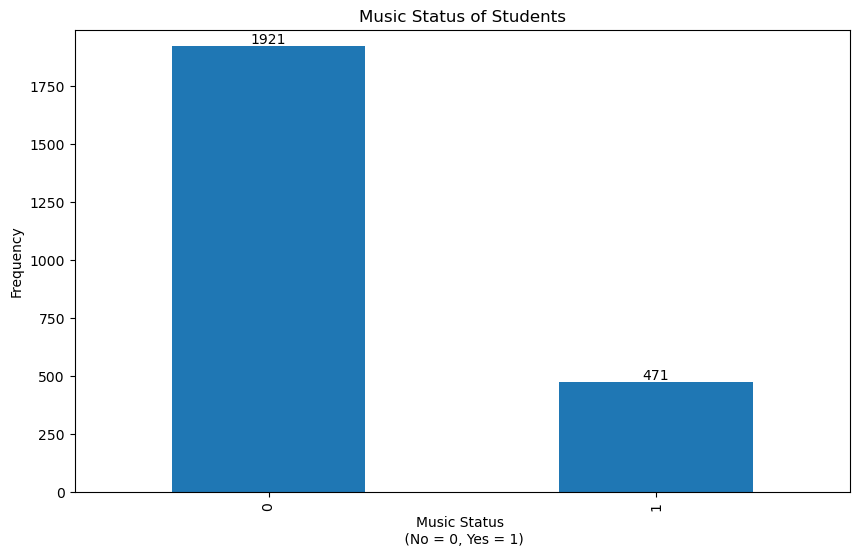

In [38]:
#Music
plt.figure(figsize=(10, 6))
count = raw_data_copy['Music'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Music Status of Students', 
    xlabel = 'Music Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *1921 students do not take music (0)*
- *471 students do take music (1)*

*This represents a large gap between students who take music and those who don't. While the numbers alone don't show causation, it's worth exploring whether music involvement has a positive or negative impact on the GradeClass. Students involved in music might develop discipline and cognitive skills that could enhance performance or if it's time-consuming, it might detract from study time. A bivariate analysis comparing Music and GradeClass would help uncover any meaningful patterns or correlations.*

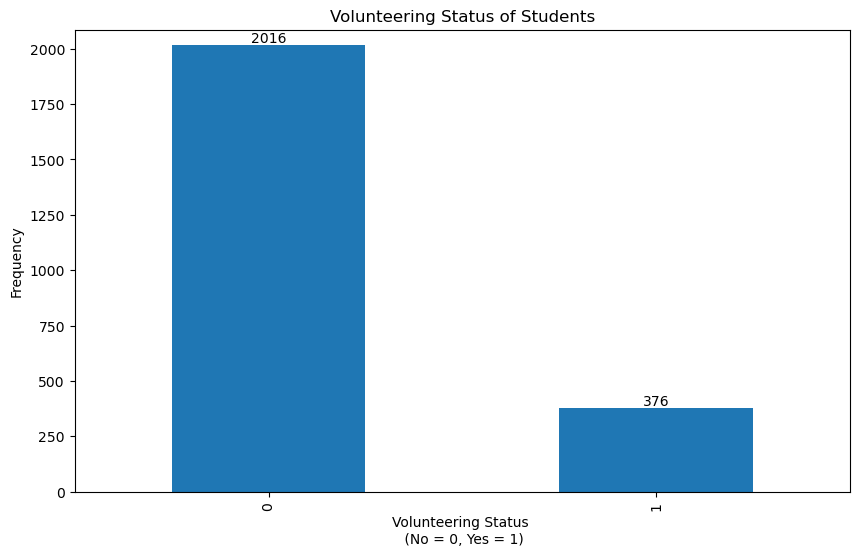

In [39]:
#Volunteering
plt.figure(figsize=(10, 6))
count = raw_data_copy['Volunteering'].value_counts()

#Plot bar graph
chart = count.plot.bar(
    title = 'Volunteering Status of Students', 
    xlabel = 'Volunteering Status \n (No = 0, Yes = 1)',
    ylabel = 'Frequency'
)

for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(v),
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 70) 
plt.show()

***Insight Gained***

*The graph shows:*
- *2016 students do not volunteer (0)*
- *376 students do volunteer (1)*

*This reflects a substantial difference in participation, with volunteering being relatively uncommon among the student population. The low number of volunteers could imply that those who do volunteer are more motivated, responsible, or time-managed, traits that might positively influence the GradeClass. However, it's also possible that volunteering takes time away from studying, potentially impacting grades negatively for some.
To determine the actual influence, further bivariate analysis between Volunteering and GradeClass is needed to explore potential trends or correlations.*

***Independent (ordinal)***

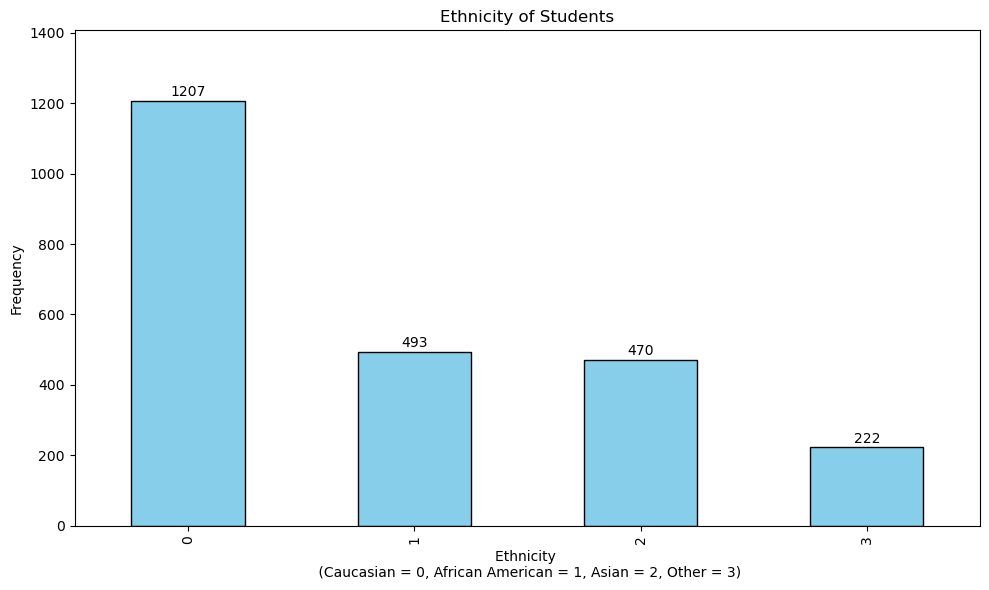

In [40]:
#Ethnicity
count = raw_data_copy['Ethnicity'].value_counts()

# Plot setup
plt.figure(figsize=(10, 6))
chart = count.plot.bar(
    title='Ethnicity of Students',
    xlabel='Ethnicity \n (Caucasian = 0, African American = 1, Asian = 2, Other = 3)',
    ylabel='Frequency',
    color='skyblue',
    edgecolor='black'
)

for i, v in enumerate(count):
    chart.text(i, v + 5, str(v), ha='center', va='bottom') 
plt.ylim(0, max(count) + 200)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *1207 students are Caucasian (0)*
- *493 students are African American (1)*
- *470 students are Asian (2)*
- *222 students are Other (3)*

*There is a noticeable imbalance in representation across ethnicity groups, with Caucasian students forming the majority. This uneven distribution may lead to limited generalizability when comparing the GradeClass across ethnicities. While ethnicity could potentially influence GPA due to external socio-economic or cultural factors, the current data distribution suggests that its impact may be minimal and to validate this assumption, a bivariate analysis comparing Ethnicity with GradeClass would be useful.*

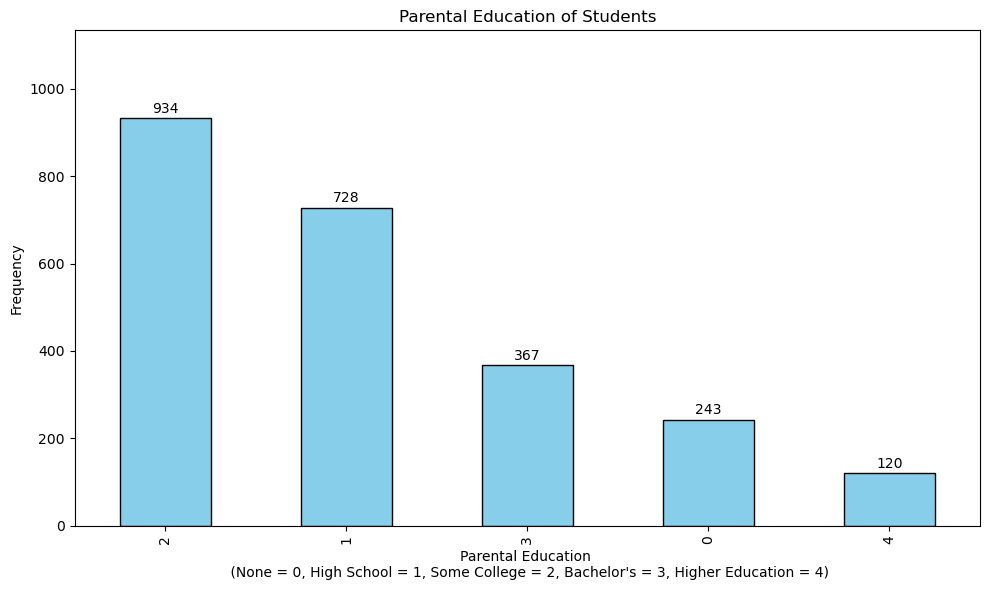

In [41]:
#ParentalEducation
count = raw_data_copy['ParentalEducation'].value_counts()

# Plot setup
plt.figure(figsize=(10, 6))
chart = count.plot.bar(
    title='Parental Education of Students',
    xlabel="Parental Education \n (None = 0, High School = 1, Some College = 2, Bachelor's = 3, Higher Education = 4)",
    ylabel='Frequency',
    color='skyblue',
    edgecolor='black'
)

for i, v in enumerate(count):
    chart.text(i, v + 5, str(v), ha='center', va='bottom') 
plt.ylim(0, max(count) + 200)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *243 student's parents have no education (0)*
- *728 student's parents have a high school education (1)*
- *934 student's parents have a some college education (2)*
- *367 student's parents have a bachelor's level education (3)*
- *120 student's parents have higher level education (4)*

*The data indicates that most students come from households where parents have at least a high school education. The distribution is skewed towards lower to mid-level educational attainment, with fewer parents having obtained bachelor’s or higher-level degrees. This skewness might suggest that parental education could influence a student’s GradeClass, particularly in households where higher education might contribute to better study environments, guidance, or support. However, the lower representation of higher education levels could limit the predictive power for these categories.
A follow-up bivariate analysis comparing ParentalEducation to GradeClass can help assess the strength and nature of this relationship.*

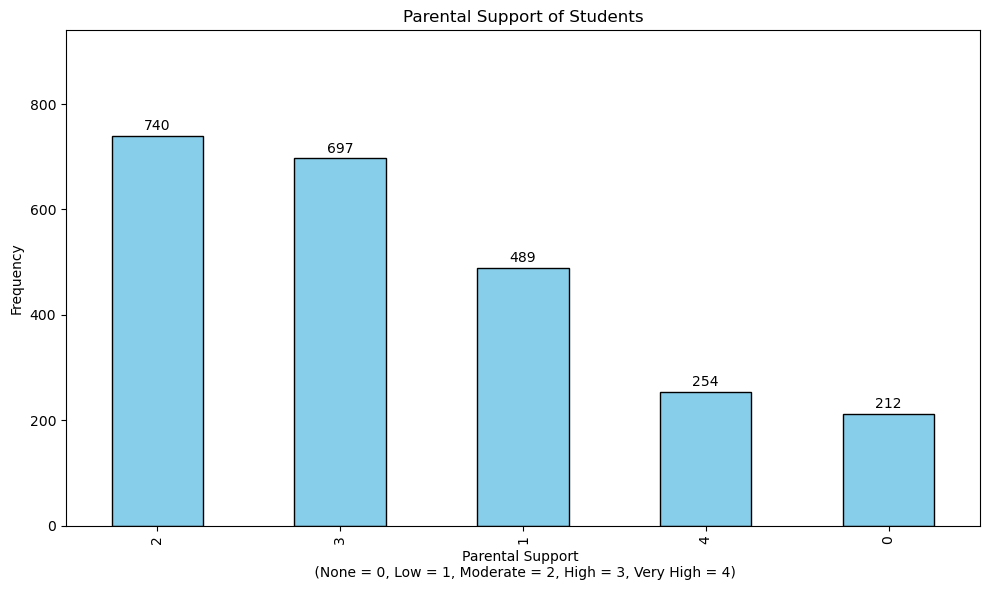

In [42]:
#ParentalSupport
count = raw_data_copy['ParentalSupport'].value_counts()

# Plot setup
plt.figure(figsize=(10, 6))
chart = count.plot.bar(
    title='Parental Support of Students',
    xlabel="Parental Support \n (None = 0, Low = 1, Moderate = 2, High = 3, Very High = 4)",
    ylabel='Frequency',
    color='skyblue',
    edgecolor='black'
)

for i, v in enumerate(count):
    chart.text(i, v + 5, str(v), ha='center', va='bottom') 
plt.ylim(0, max(count) + 200)
plt.tight_layout()
plt.show()

***Insight Gained***

*The graph shows:*
- *212 student's parents provide no support (0)*
- *489 student's parents provide low support (1)*
- *740 student's parents provide moderate support (2)*
- *697 student's parents provide high support (3)*
- *254 student's parents provide very high support (4)*

*The distribution is centered around moderate to high levels of support, with relatively fewer students reporting no or very high support. This indicates that most students receive at least some level of parental involvement, which may positively impact academic performance. While the distribution is slightly skewed toward moderate support, the variety across support levels allows room to investigate potential trends or correlations between higher parental support and better GradeClass outcomes. Further bivariate analysis would help determine how strong this relationship is.*

#### ***Dependent (Target) Feature***
*The target feature for this data set is the **GradeClass***

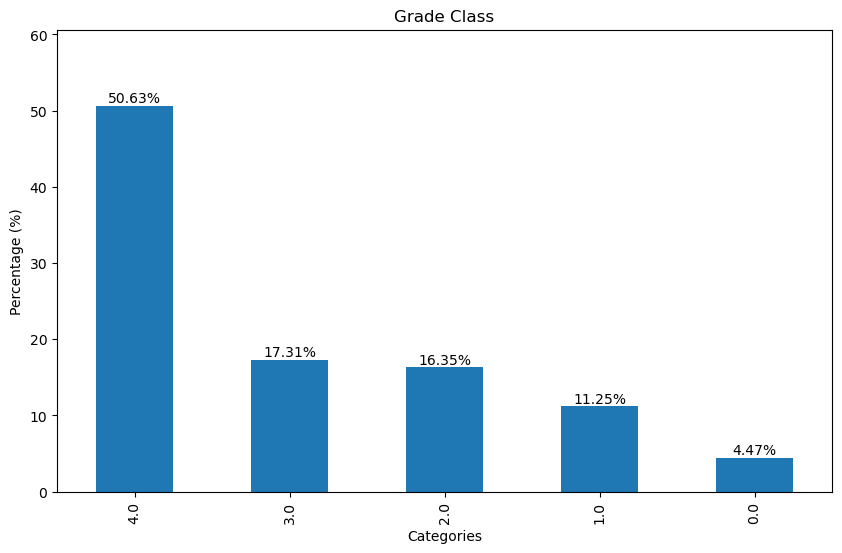

In [43]:
plt.figure(figsize=(10, 6))
count = raw_data['GradeClass'].value_counts(normalize=True)*100

#Plot bar graph
chart = count.plot.bar(
    title = 'Grade Class', 
    xlabel = 'Categories',
    ylabel = 'Percentage (%)'
)

#Add rounded off values for each bar
for i, v in enumerate(count):
    chart.text(i, v + 0.01, f"{round(v, 2)}%",
               ha= 'center',
               va = 'bottom'
              )
plt.ylim(0, max(count) + 10)
plt.show()

***Insight Gained***:

*By converting the distibution values to a percentage allows for better insight and readbility of the dataset*

*From the data we can see the GradeClass percentages:*
- *A: 4.47%*
- *B: 11.25%*
- *C: 16.35%*
- *D: 17.31%*
- *F: 50.63%*

*The grade distribution shows that the majority of individuals (50.63%) failed, with a significant portion (17.31%) passing but performing below expectations. A moderate percentage (16.35%) achieved average results, while a smaller group (11.25%) performed well. Only a small fraction (4.47%) reached the highest grade. This suggests that the majority of the students need assistance or support.*

### ***B. Bivariate Analysis***
*Bivariate analysis is the process of analysing two variables together. The data is analysed to find the relationship between the dependent and independent variables.*

*The graphs below will visualise the impact that each independent feature has on the target variable (GradeClass).*

#### ***Numeric Indepenednt Features and Dependent Feature***

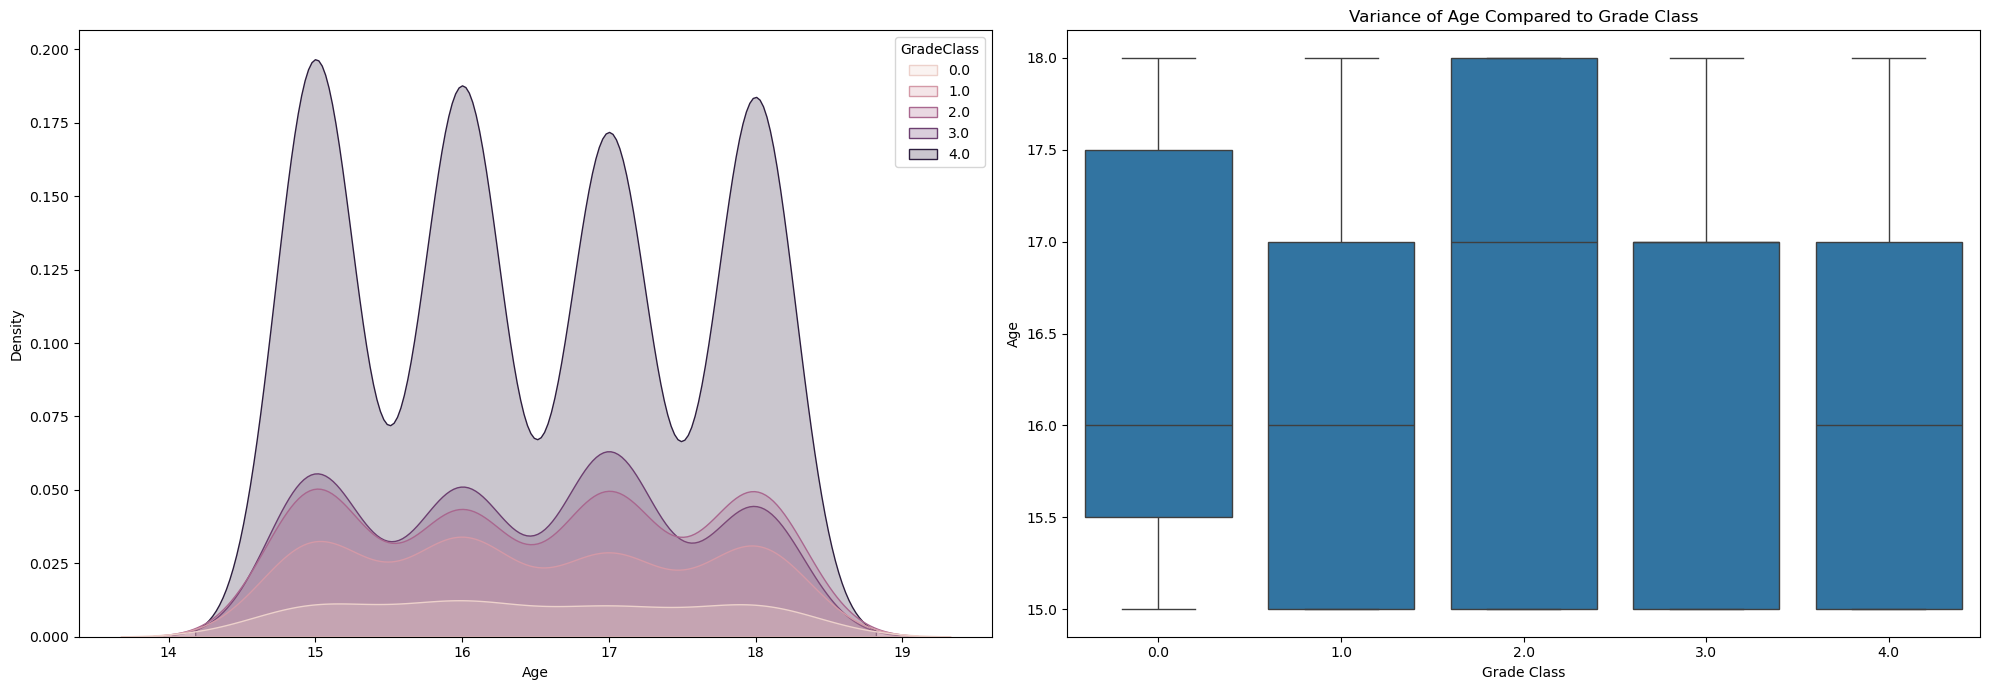

F-statistic: 0.16771783234757068, p-value: 0.9548495077916599


In [44]:
#Age and GradeClass
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Age'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Age'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Age'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Age'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Age']
)
plt.figure(figsize=(20, 7))

plt.subplot(121)  
sns.kdeplot(data=raw_data_copy, x='Age', hue='GradeClass', fill=True)


plt.subplot(122)  
sns.boxplot(x='GradeClass', y='Age', data=raw_data_copy)
plt.title('Variance of Age Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Age')

plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Kernel Density Estimate Plot:***
- *This shows the distribution of ages for each GradeClass.*
- *The age distribution is almost identical across all Grade Classes.*
- *Each GradeClass (from A to F) shows peaks at the same age intervals (15, 16, 17, 18), indicating no significant shift in age across different grades.*
- *This suggests that age is not a strong differentiator for GradeClass in the dataset.*

***Right Plot – Box Plot***
- *This shows summary statistics of age for each GradeClass*
- *Medians are nearly the same across most Grade Classes except C(2) which has the largest spread of ages.*
- *It can also be seen that the higher grade classes (D, F) have smaller variances in the ages.*  
- *No noticeable outliers or extreme variation.*

***This pattern identified:***
- *The box plot shows declining medians.*
- *The strip plot shows denser study clusters at lower grade classes.*
- *The Analysis of Variance (ANOVA) test shows a significant p-value confirming the differences aren’t due to random variation.*

*The F-statistic is very low (0.1677), and the p-value is 0.9548, which is significantly higher than the common significance threshold of 0.05. This suggests that there is no statistically significant relationship between age and Grade Class. Therefore, age does not seem to strongly influence the grade class distribution in this dataset.*

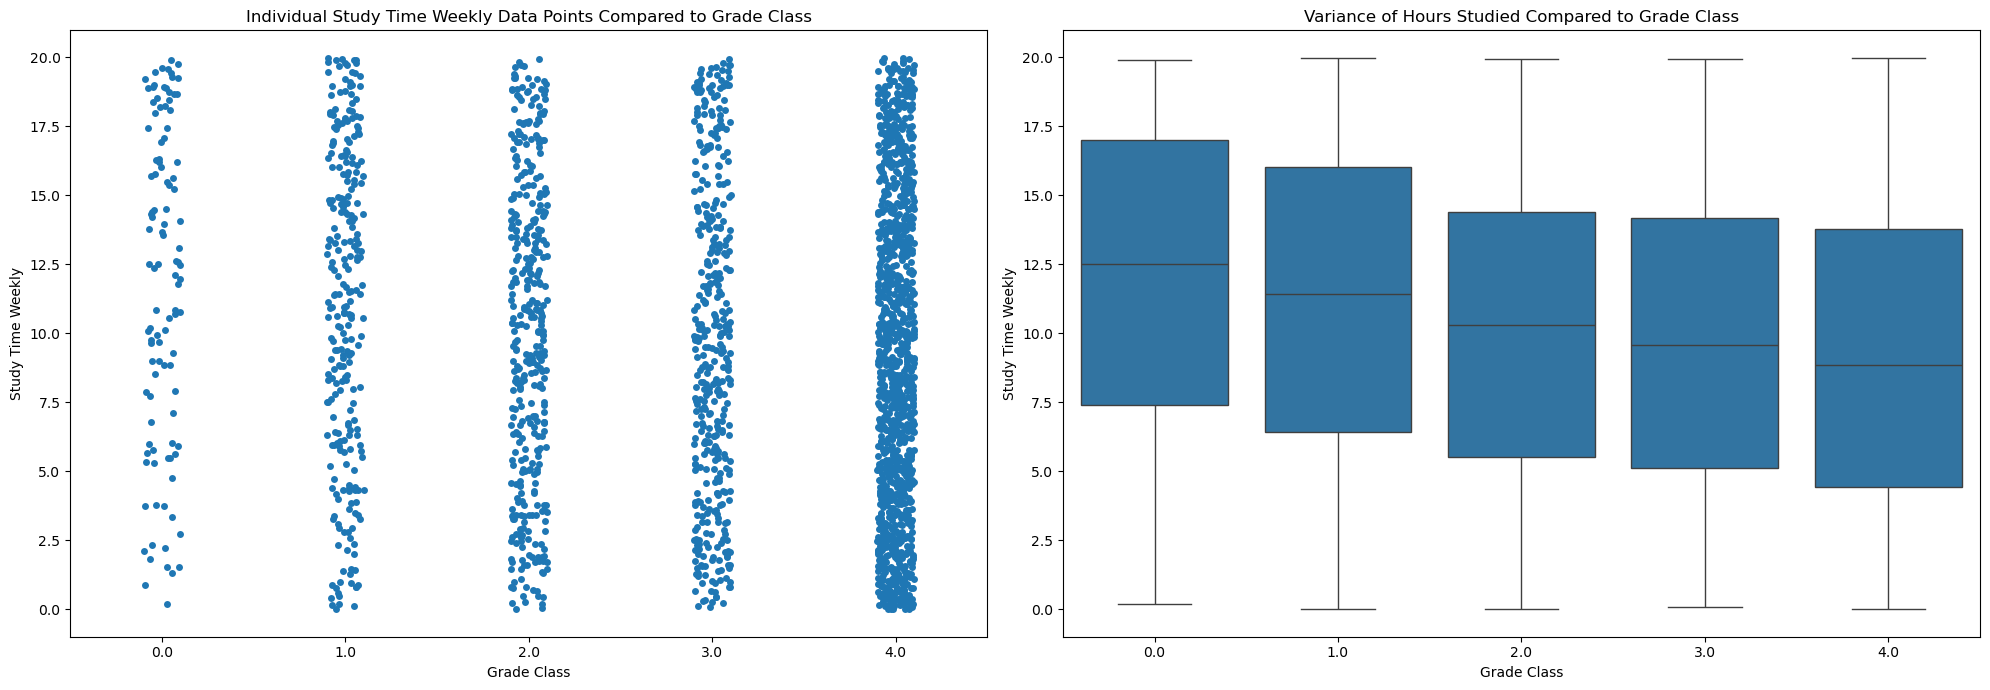

F-statistic: 11.269250054082054, p-value: 4.644425474306781e-09


In [45]:
#StudyTimeWeekly and GradeClass
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['StudyTimeWeekly'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['StudyTimeWeekly'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['StudyTimeWeekly'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['StudyTimeWeekly'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['StudyTimeWeekly']
)
plt.figure(figsize=(20, 7))

plt.subplot(121)  
sns.stripplot(x='GradeClass', y='StudyTimeWeekly', data=raw_data_copy, jitter=True)
plt.title('Individual Study Time Weekly Data Points Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Study Time Weekly')

plt.subplot(122)  
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=raw_data_copy)
plt.title('Variance of Hours Studied Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Study Time Weekly')

plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Strip Plot:***
- *Shows individual data points of weekly study time for each GradeClass.*
- *Shows variability in how much students study within each class.*
- *Some grade classes A(0) and B(1) have more spread*

***Right Plot – Box Plot***
- *Displays median, interquartile range (IQR), and outliers of study times for each grade class.*
- *Shows:*
    - *Median study time decreases slightly from GradeClass A(0) to GradeClass F(4).*
    - *GradeClass A(0) and B(1) have higher medians and slightly wider IQRs.*
    - *GradeClass F(4) appears to have the lowest median and is more tightly packed.*

***This pattern identified:***
- *The box plot shows declining medians.*
- *The strip plot shows denser study clusters at lower grade classes.*
- *The Analysis of Variance (ANOVA) test shows a significant p-value confirming the differences aren’t due to random variation.*

*The F-statistic is quite high (11.27), and the p-value is extremely low (4.64e-09), which is far below the common significance threshold of 0.05. This indicates that there is a statistically significant relationship between Study Time Weekly and Grade Class. Therefore, the amount of time students study each week appears to have a strong influence on their grade class in this dataset.*

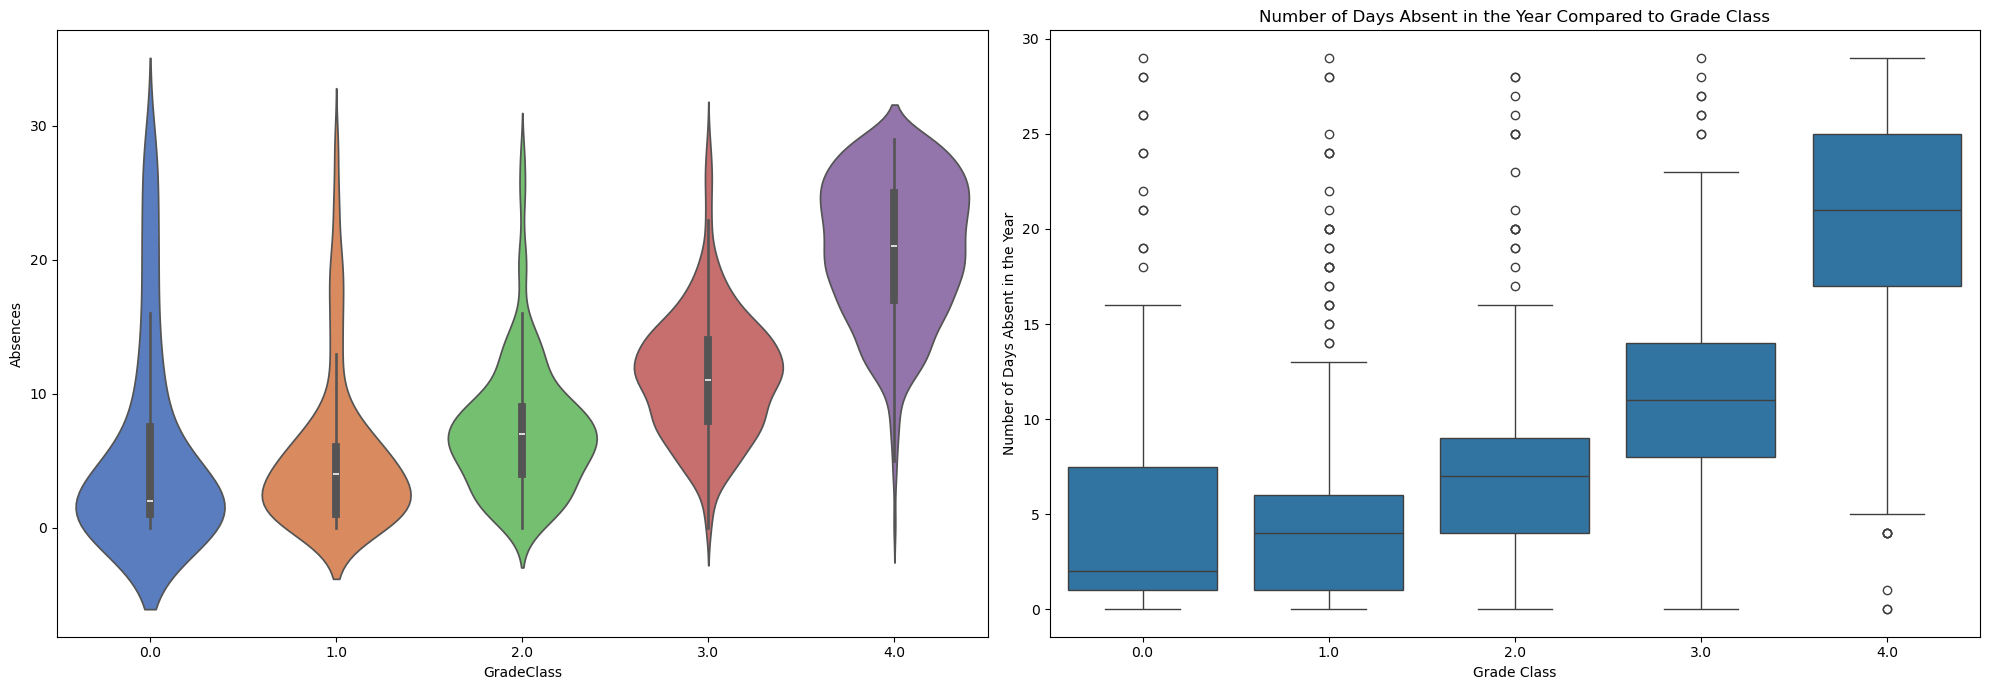

F-statistic: 903.1176108419992, p-value: 0.0


In [46]:
#Absence and GradeClass
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Absences'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Absences'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Absences'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Absences'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Absences']
)
plt.figure(figsize=(20, 7))

plt.subplot(121)  
sns.violinplot(x='GradeClass', y='Absences', data=raw_data_copy, palette='muted')

plt.subplot(122)  
sns.boxplot(x='GradeClass', y='Absences', data=raw_data_copy)
plt.title('Number of Days Absent in the Year Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Number of Days Absent in the Year')

plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Violin Plot:***
- *The distribution of absences becomes wider and shifts higher as we move from GradeClass A (0) to GradeClass F (4).*
- *Students in GradeClass A and B have fewer absences, with their data tightly concentrated around the lower end of the scale.*
- *In contrast, students in lower grade classes (D and F) tend to have more absences, and their distributions are broader and more spread out.*
- *This visual trend suggests a positive correlation between the number of absences and poorer academic performance.*

***Right Plot – Box Plot***
- *We observe an upward trend in the median number of absences as GradeClass worsens (from A to F).*
- *The interquartile ranges (IQRs) also widen, especially for GradeClass D(3) and F(4), indicating greater variation in absences for students with lower grades.*
- *There are more outliers in higher GradeClasses, but the central tendency still reflects a clear trend: more absences are associated with worse grades.*

***This pattern identified:***
- *The box plot shows rising medians from GradeClass A to F.*
- *The violin plot highlights increasing density of high-absence students in lower grade classes.*
- *The ANOVA test provides strong statistical support for this observation.*

*A high F-statistic and a p-value of 0.0 confirms that the differences in absences across GradeClasses are statistically significant and not due to random variation. Therefore, the amount of days absent each year appears to have a strong influence on a students grade class.*

#### ***Binary Indepenednt Features and Dependent Feature***

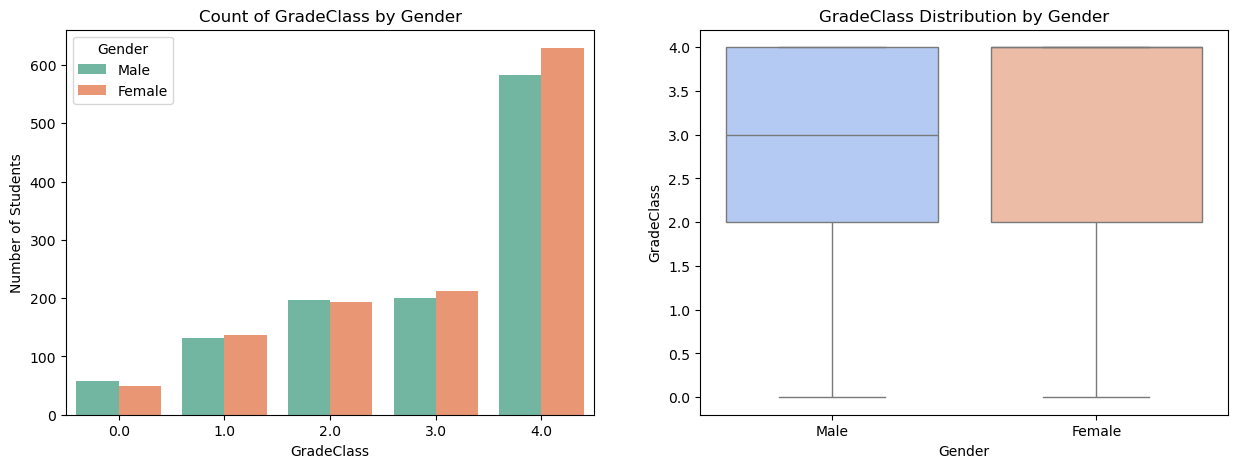

F-statistic: 0.4782252195363547, p-value: 0.7517683058272329


In [47]:
#Gender
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Gender'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Gender'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Gender'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Gender'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Gender']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Gender', palette='Set2')
plt.title('Count of GradeClass by Gender')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Gender', labels=['Male', 'Female'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Gender', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('GradeClass Distribution by Gender')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Both male and female students are represented across all GradeClasses, but the number of students increases steadily as GradeClass declines from A(0) to F(4).*
- *Female students slightly outnumber males in most GradeClasses, particularly in the lowest performing category, GradeClass F(4).*
- *This suggests that while gender distribution is fairly even, more females are ending up in lower grade classes than males.*

***Right Plot – Box Plot***
- *GPA distributions for male and female students are similar.*
- *The median GPA for both genders is nearly identical, suggesting that gender alone may not be a strong predictor of GradeClass.*
- *There’s slightly more variability in male GPA, but both genders show comparable interquartile ranges and outliers.*

***This pattern identified:***
- *The count plot shows that while gender participation is fairly balanced, slightly more female students fall into lower grade categories.*
- *The box plot does not indicate any strong differences in GradeClass between males and females.*
- *This may suggest that gender, as an independent feature, does not have a strong impact on GradeClass but may slightly affect grade classification outcomes.*

*A low F-statistic and a high p-value indicate that the differences in GradeClass across genders are not statistically significant. Therefore, gender does not appear to have a meaningful influence on GradeClass. Any observed differences are likely due to random variation.*

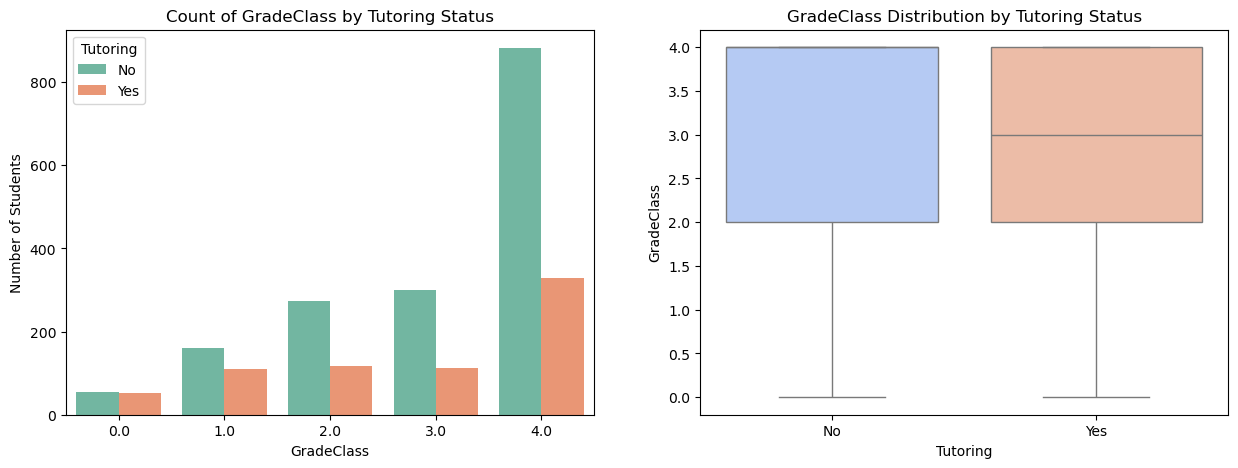

F-statistic: 9.569208148206243, p-value: 1.1263954988041777e-07


In [48]:
#Tutoring
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Tutoring'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Tutoring'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Tutoring'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Tutoring'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Tutoring']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Tutoring', palette='Set2')
plt.title('Count of GradeClass by Tutoring Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Tutoring', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Tutoring', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Tutoring Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *There are significantly more students without tutoring in the lowest GradeClass F(4), compared to those receiving tutoring.*
- *Tutored students are more evenly spread across the GradeClasses, with notably fewer in the lowest GradeClass.*
- *This pattern suggests that students who receive tutoring are less likely to fall into the lowest grade group, indicating a potential academic benefit.*

***Right Plot – Box Plot***
- *The median GradeClass for tutored students is lower compared to non-tutored students.*
- *Non-tutored students show a wider spread toward poorer grades, while tutored students tend to cluster closer to the better GradeClasses.*
- *This visual evidence supports the idea that tutoring has a positive effect on academic outcomes.*

***This pattern identified:***
- *The count plot reveals that students who don’t receive tutoring fall mostly into the failing grade group.*
- *The box plot highlights a clear improvement in GradeClass distribution for students who receive tutoring.*
- *The ANOVA test provides strong statistical evidence to support the visual trend.*

*A high F-statistic and an extremely low p-value confirm that the differences in GradeClass between tutored and non-tutored students are statistically significant. Therefore, receiving tutoring appears to have a strong and positive influence on student academic performance in this dataset.*

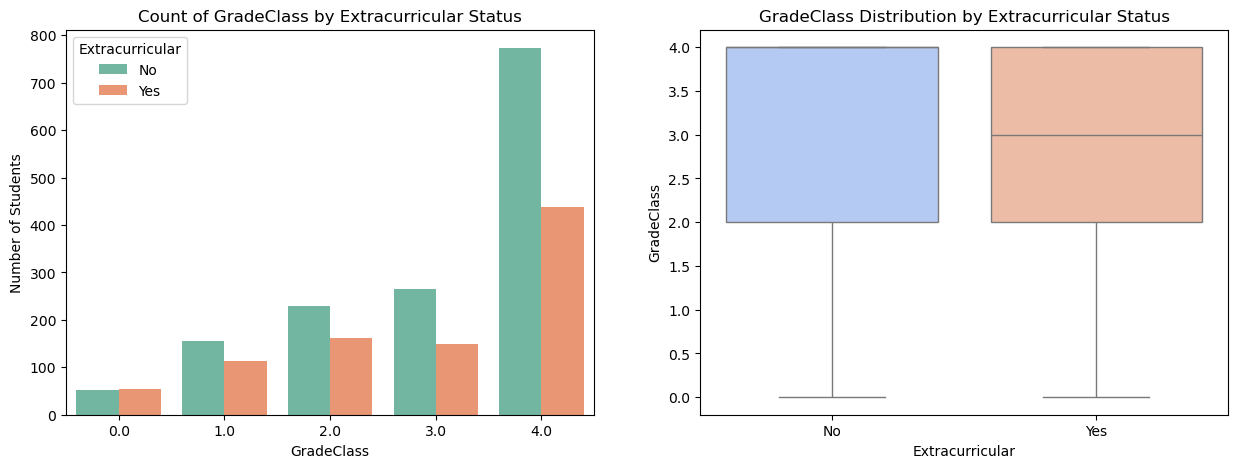

F-statistic: 3.568045637427275, p-value: 0.006579747194651358


In [49]:
#Extracurricular
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Extracurricular'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Extracurricular'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Extracurricular'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Extracurricular'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Extracurricular']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Extracurricular', palette='Set2')
plt.title('Count of GradeClass by Extracurricular Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Extracurricular', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Extracurricular', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Extracurricular Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Students not involved in extracurricular activities are more heavily represented in the lowest GradeClass F(4).*
- *Those participating in extracurricular activities are more evenly distributed across the GradeClasses, with a noticeably smaller group falling into the failing category.*
- *This trend suggests that involvement in extracurricular activities may be associated with a better GradeClass.*

***Right Plot – Box Plot***
- *Students involved in extracurricular activities tend to have a lower median GradeClass compared to those who are not.*
- *The distribution of GradeClasses for students without extracurricular involvement skews more heavily toward poorer grades.*
- *This difference indicates a potential positive impact of extracurricular participation on student performance.*

***This pattern identified:***
- *The count plot shows that non-participating students dominate the failing group (GradeClass 4).*
- *The box plot supports this by showing a lower central tendency for students in extracurriculars.*
- *The ANOVA test provides statistically significant evidence supporting the visual patterns.*

*A relatively high F-statistic and a p-value below 0.01 confirm that the differences in GradeClass between students who participate in extracurricular activities and those who don’t are statistically significant. Thus, participating in extracurricular activities appears to contribute positively to academic performance.*

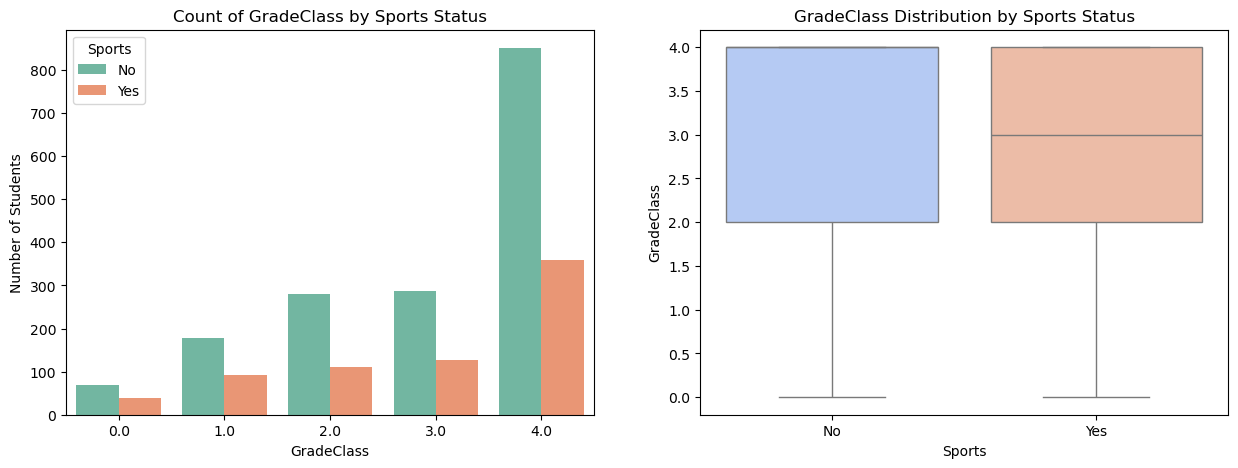

F-statistic: 1.0920203610875618, p-value: 0.3587435557256194


In [50]:
#Sports
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Sports'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Sports'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Sports'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Sports'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Sports']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Sports', palette='Set2')
plt.title('Count of GradeClass by Sports Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Sports', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Sports', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Sports Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Students who do not participate in sports activities are more prevalent in the lowest GradeClass F(4).*
- *Those who do participate in sports are slightly better distributed but still form a substantial portion of the failing group.*
- *Unlike with extracurricular activities, the trend is not as strongly in favor of better performance for sports participants.*

***Right Plot – Box Plot***
- *Both groups have a similar median GradeClass (around 3).*
- *The distribution shape and range also appear nearly identical, suggesting that sports involvement alone may not strongly influence academic performance.*


***This pattern identified:***
- *The visual evidence shows minimal difference between the two groups.*
- *The ANOVA test supports this, showing low statistical significance.*

*A low F-statistic and a p-value well above 0.05 indicate that the difference in GradeClass between students who play sports and those who don’t is not statistically significant. Therefore, participation in sports does not appear to have a strong or consistent impact on academic performance in this dataset.*

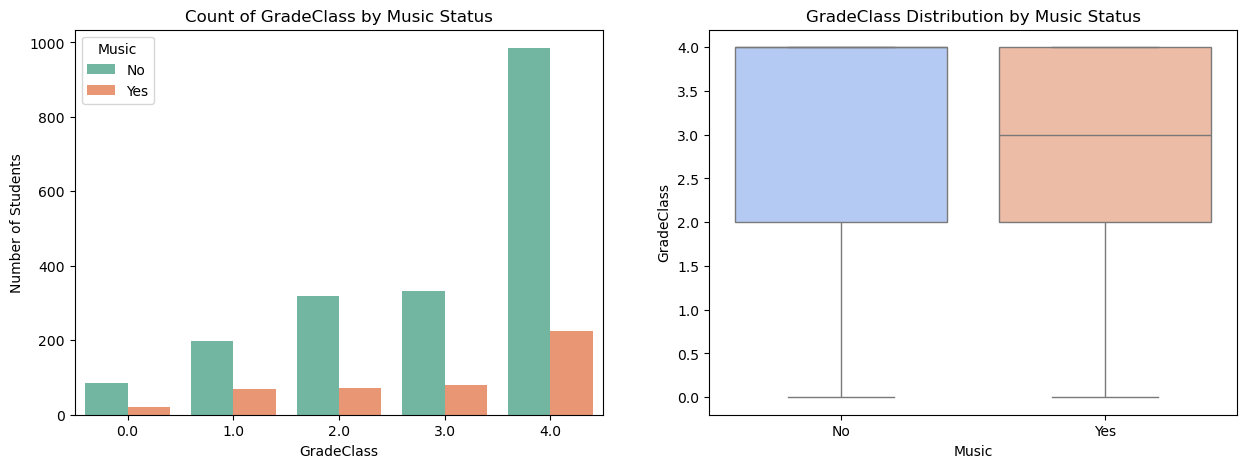

F-statistic: 1.9752596781855536, p-value: 0.09564237978404323


In [51]:
#Music
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Music'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Music'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Music'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Music'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Music']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Music', palette='Set2')
plt.title('Count of GradeClass by Music Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Music', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Music', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Music Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Students who do not participate in music activities are more prevalent in the lowest GradeClass F(4).*
- *Those who do participate in music are slightly better distributed but still form a substantial portion of the failing group.*
- *Unlike with extracurricular activities, the trend is not as strongly in favor of better performance for music participants.*

***Right Plot – Box Plot***
- *Both groups have a similar median GradeClass (around 3).*
- *The distribution shape and range also appear nearly identical, suggesting that music involvement alone may not strongly influence academic performance.*

***This pattern identified:***
- *The visual evidence shows minimal difference between the two groups.*
- *The ANOVA test supports this, showing low statistical significance.*

*A moderate F-statistic and a p-value slightly above the 0.05 threshold suggest that there may be some differences in GradeClass between the groups, but these differences are not statistically significant. This implies that any variations in GradeClass are likely due to random chance rather than a true effect of the variable being tested.*

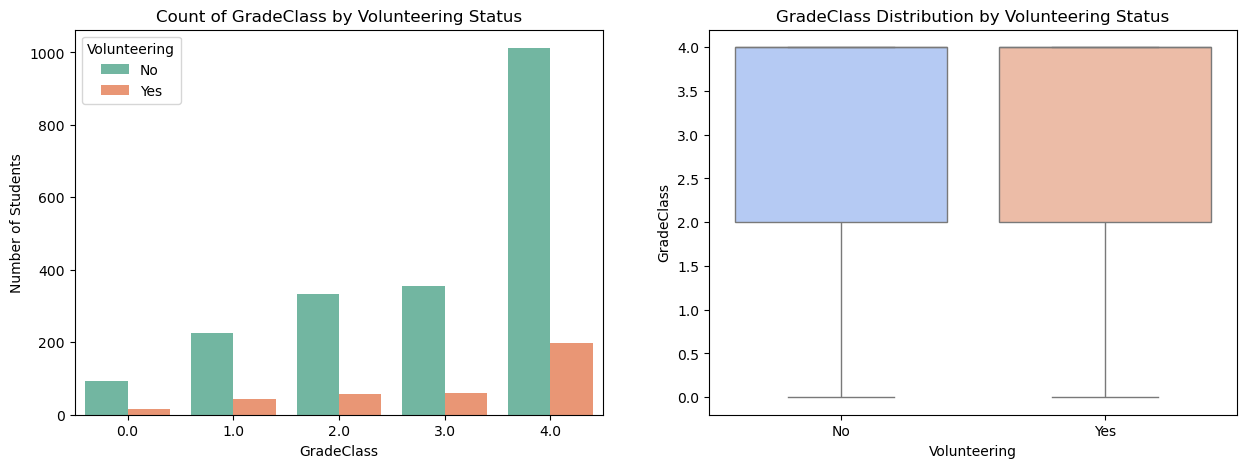

F-statistic: 0.37017935314424244, p-value: 0.8300231510368


In [52]:
#Volunteering
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Volunteering'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Volunteering'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Volunteering'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Volunteering'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Volunteering']
)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= raw_data_copy, x='GradeClass', hue='Volunteering', palette='Set2')
plt.title('Count of GradeClass by Volunteering Status')
plt.xlabel('GradeClass')
plt.ylabel('Number of Students')
plt.legend(title='Volunteering', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(data=raw_data_copy, x='Volunteering', y='GradeClass', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('GradeClass Distribution by Volunteering Status')
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Left Plot – Count Plot:***
- *Students who do not volunteer are more prevalent in the lowest GradeClass F(4).*
- *Those who do volunteer are slightly better distributed but still form a substantial portion of the failing group.*
- *Unlike with extracurricular activities, the trend is not as strongly in favor of better performance for those that volunteer.*

***Right Plot – Box Plot***
- *Both groups have a similar median GradeClass (around 3).*
- *The distribution shape and range also appear nearly identical, suggesting that volunteering alone may not strongly influence academic performance.*


***This pattern identified:***
- *The visual evidence shows minimal difference between the two groups.*
- *The ANOVA test supports this, showing low statistical significance.*

*A low F-statistic and a high p-value of 0.83 indicate that the differences in GradeClass across groups are not statistically significant and are likely due to random variation. Therefore, volunteering does not appear to have a meaningful influence on a student's grade class.*

#### ***Ordinal Indepenednt Features and Dependent Feature***

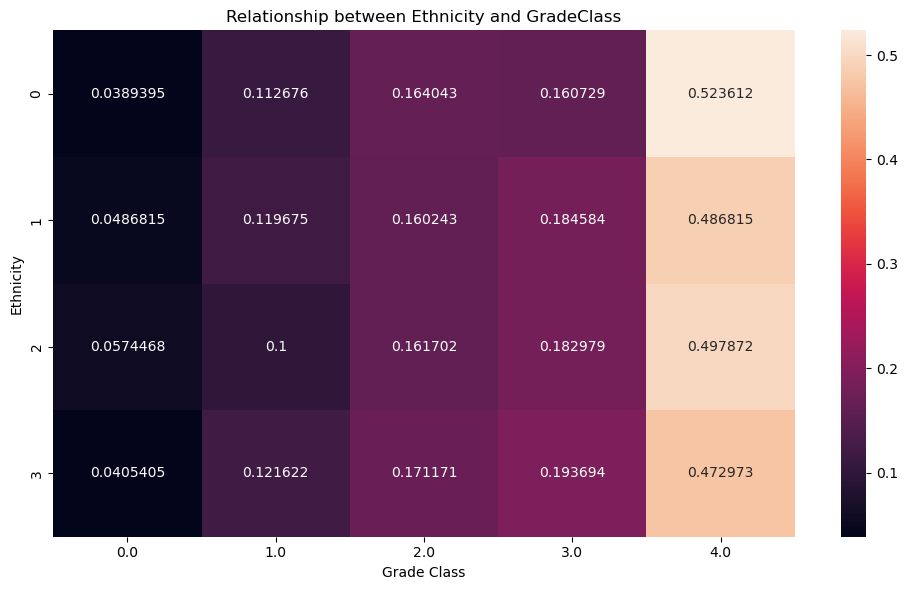

F-statistic: 1.0560734337522977, p-value: 0.3767524310351785


In [53]:
#Ethnicity
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['Ethnicity'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['Ethnicity'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['Ethnicity'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['Ethnicity'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['Ethnicity']
)

crosstab = pd.crosstab(raw_data_copy['Ethnicity'], raw_data_copy['GradeClass'])

#Normalise due to group size differences
crosstab = crosstab.div(crosstab.sum(axis=1), axis=0)

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='g') 
plt.title('Relationship between Ethnicity and GradeClass')
plt.xlabel('Grade Class')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

*The data was normalised to take into consideration the large difference in the number of students of each Ethnicity to prevent bias towards the larger groups.*

***Heatmap - Count Plot:***
- *The heatmap shows the proportional distribution of students from each ethnicity group across GradeClasses.*
- *All ethnic groups have the highest proportion of students in GradeClass F (4), with values hovering around 0.47 to 0.52.*
- *The distribution across other GradeClasses is relatively uniform with minor differences between ethnicities.*
- *There are no dramatic variations in how GradeClasses are distributed across different ethnic groups.*


***This pattern identified:***
- *Each ethnic group’s heatmap row shows a very similar pattern, indicating consistency in grade distributions across ethnicities.*
- *No single ethnicity stands out as performing significantly better or worse than others.*
- *The consistent shading across ethnicities and GradeClasses visually supports the absence of any strong group-based academic disparity.*

*A low F-statistic and a high p-value of 0.38 indicate that the differences in GradeClass across Ethnicity groups are not statistically significant and may be due to random variation. Therefore, Ethnicity does not appear to have a strong influence on a student's grade class.*

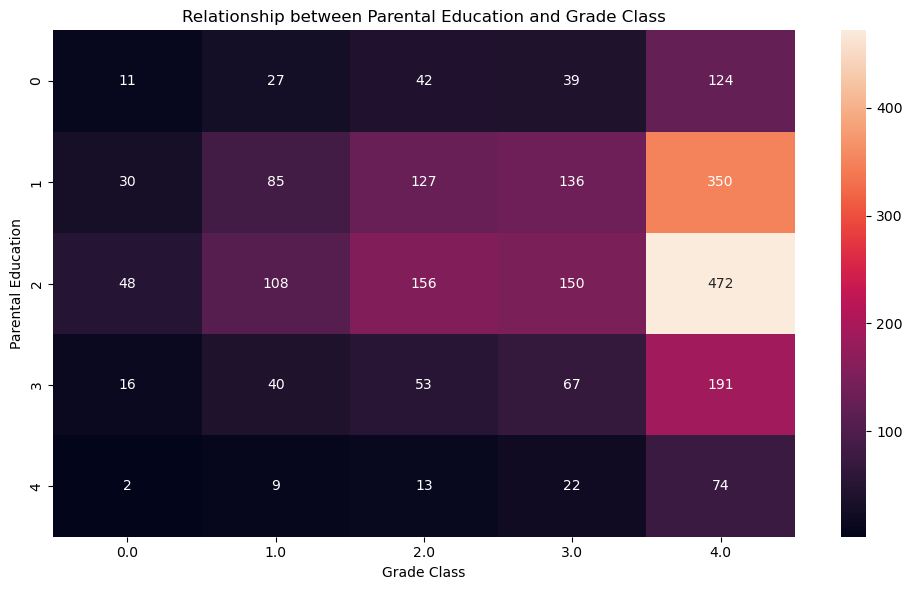

F-statistic: 1.3767088184422958, p-value: 0.23948379263133682


In [54]:
#ParentalEducation
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['ParentalEducation'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['ParentalEducation'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['ParentalEducation'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['ParentalEducation'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['ParentalEducation']
)

crosstab = pd.crosstab(raw_data_copy['ParentalEducation'], raw_data_copy['GradeClass'])

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='g') 
plt.title('Relationship between Parental Education and Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Parental Education')
plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Heatmap - Count Plot:***
- *The heatmap visualizes the count of students across different levels of parental education and their corresponding GradeClasses.*
- *A higher concentration of students is seen in GradeClass F (4) across all parental education levels.*
- *Parental education level 2 shows the highest overall count across all grade classes, especially in GradeClass F (472 students), followed by level 1 (350 students).*
- *The lowest number of students are from parental education level 4, yet most of them still fall into the lowest GradeClass.*
- *There is no consistent trend where higher parental education is associated with better grade performance.*

***This pattern identified:***
- *Despite slight variations in student counts, GradeClass F consistently has the highest number of students regardless of parental education.*
- *The distribution across GradeClasses appears relatively similar across different parental education levels.*
- *The heatmap does not provide strong visual evidence that higher parental education significantly improves student academic outcomes.*

*A moderate F-statistic and a relatively high p-value of 0.239 suggest that differences in GradeClass across varying parental education levels are not statistically significant. Thus, parental education does not appear to have a strong, direct influence on a student's grade class.*

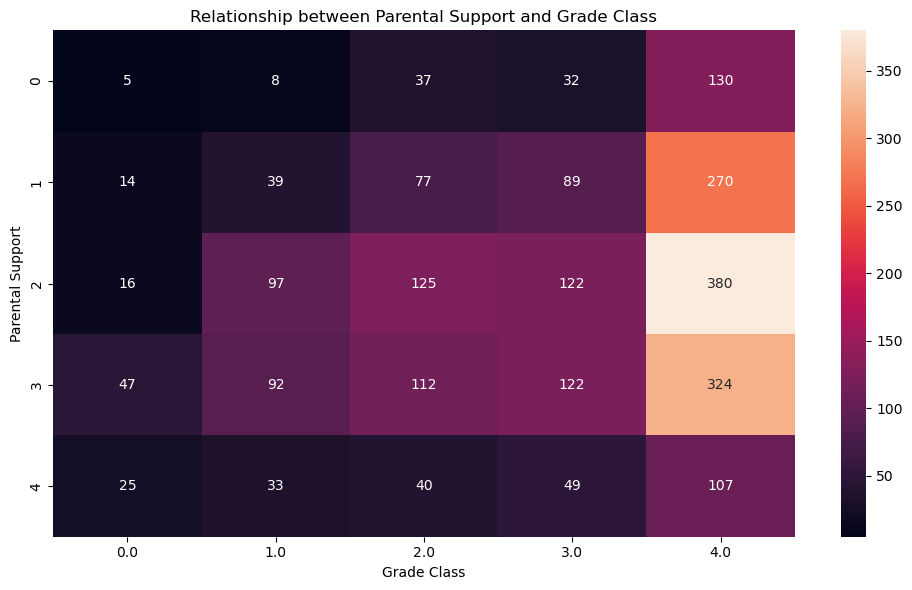

F-statistic: 13.936767875288535, p-value: 3.052782106028322e-11


In [55]:
#ParentalSupport
f_stat, p_value = stats.f_oneway(
    raw_data_copy[raw_data_copy['GradeClass'] == 0]['ParentalSupport'],
    raw_data_copy[raw_data_copy['GradeClass'] == 1]['ParentalSupport'],
    raw_data_copy[raw_data_copy['GradeClass'] == 2]['ParentalSupport'],
    raw_data_copy[raw_data_copy['GradeClass'] == 3]['ParentalSupport'],
    raw_data_copy[raw_data_copy['GradeClass'] == 4]['ParentalSupport']
)

crosstab = pd.crosstab(raw_data_copy['ParentalSupport'], raw_data_copy['GradeClass'])

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='g') 
plt.title('Relationship between Parental Support and Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Parental Support')
plt.tight_layout()
plt.show()
print(f"F-statistic: {f_stat}, p-value: {p_value}")

***Insight Gained***:

***Heatmap - Count Plot:***
- *The heatmap illustrates the relationship between levels of parental support and student GradeClass outcomes.*
- *There is a strong concentration of students in GradeClass F (4) across all levels of parental support, particularly at support level 2 (380 students) and 3 (324 students).*
- *As parental support increases from 0 to 3, the number of students in higher grade classes (B to D) also rises, suggesting some benefit to moderate support levels.*
- *However, even at the highest support level (4), most students still fall into the lowest grade class (F), implying diminishing returns at extreme levels or potential data imbalance.*


***This pattern identified:***
- *Parental support levels 2 and 3 have the highest student representation overall and across all GradeClasses.*
- *While GradeClass F dominates across the board, there is a noticeable upward distribution in better grades (GradeClass B to D) as support increases from 0 to 3.*
- *Parental support appears to influence academic performance to some extent, especially in the mid-range support levels.*

*A high F-statistic of 13.94 and a near-zero p-value (3.05e-11) confirm that the differences in GradeClass across varying levels of parental support are statistically significant. Therefore, parental support has a meaningful influence on student grade outcomes.*

## ***2. Hypothesis***

**Hypothesis 1**

Students with a higher absenteesim are predicted to have a much lower GPA than of students who have a lower absenteesim rate.
We hypothesize that for every increase in the number of absences, 
a student's GPA will decrease. Additionally, students who have a higher study time are more likely to have a 
higher GPA despite being absent.
We also predict that the students with parental support and those who receive 
tutoring are more likely to have higher GPA, even if they have a higher absenteesim rate, which suggests that 
the interventions of parents and tutoring are able to mitigate the negative effect that absenteesim has on the 
academic performance

## ***3. Data Cleaning***

#### ***A. Handle Missing Values***

In [56]:
#Calculates what percentage of the total enteries have missing values
missing_values = (
    raw_data_copy.isnull().sum()/len(raw_data_copy)*100
).astype(int)

#Title and underline
print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)

missing_values

Column			% missing
-----------------------------------


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int32

*There are no missing values*

#### ***Removing Duplicate Data***

In [57]:
#Check duplicated values
raw_data_copy.duplicated().value_counts()

False    2392
Name: count, dtype: int64

*There are no duplicate entries*

#### ***C. Data Type Conversion***

In [58]:
#Converts the GradeClass values into integres to better represent category values (A = 0, B=1, C=2, D=3, F=4)
raw_data['GradeClass'] = raw_data['GradeClass'].astype(int)
raw_data[['GradeClass']].head()

,GradeClass
0,2
1,1
2,4
3,3
4,4


#### ***D. Outlier Value Handling***

*During the data analysis section outliers were identified in the bivariate analysis of days absent in realtion to the grade class.*

*Below is the barplots that show the outliers identified*

Text(0, 0.5, 'Number of Days Absent in the Year')

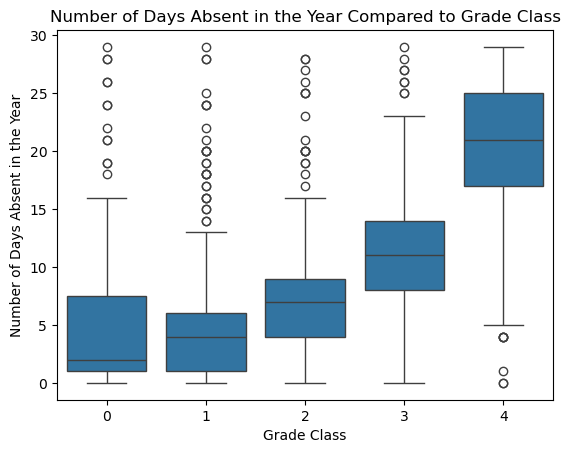

In [59]:
sns.boxplot(x='GradeClass', y='Absences', data=raw_data_copy)
plt.title('Number of Days Absent in the Year Compared to Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Number of Days Absent in the Year')

***Context***

*Individually, absences appear normally distributed and balanced (no strong skew or outliers).*

*But when related to GradeClass, a clear pattern emerges:*
- *More absences = worse performance.*
- *Strong ANOVA evidence backs this up.*
- *Outliers emerge in context — they weren’t outliers in isolation but become so within specific GradeClasses.*

***Keeping the outliers***

*It was decided to keep these outliers for the following reasons:*
- *They may hold valuable insights, especially since they only appear as outliers in relation to the target, not on their own.*
- *Removing them too early could bias the dataset, leading to unrealistic or less generalizable models.*
- *They help test model robustness, showing how well the model handles edge cases and real-world variability.*
- *The can also be remove or adjust later, after evaluating their actual impact on model performance.*

#### ***E. Remove Irrelavent Features***

In [60]:
#Drop irrelavent features (StudentID)
raw_data_copy = raw_data_copy.drop(columns=['StudentID'], inplace=False)

#Check dimensions
print(f'The data has {raw_data_copy.shape[0]} rows and {raw_data_copy.shape[1]} columns')
raw_data_copy.head()

The data has 2392 rows and 14 columns


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [61]:
#Drop Direct features (GPA)
raw_data_copy = raw_data_copy.drop(columns=['GPA'], inplace=False)

#Check dimensions
print(f'The data has {raw_data_copy.shape[0]} rows and {raw_data_copy.shape[1]} columns')
raw_data_copy.head()

The data has 2392 rows and 13 columns


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4


***GPA was removed becuase it has a direct effect on predicting GradeClass. This will force the model to learn the relationships between other features like study habits, parental support and extracurricular activities have on GradeClass outcome, without directly using GPA as a predictor.***

## ***4. Split Data***

In [62]:
# Shuffle the data
raw_data_copy = raw_data_copy.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data
train_size = int(0.8 * len(raw_data_copy))
train_data = raw_data_copy.iloc[:train_size]
test_data = raw_data_copy.iloc[train_size:]

# Save to CSV
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

# Print stats
print(f"Total rows: {len(raw_data_copy)}")
print(f"Train: {len(train_data)} rows")
print(f"Test: {len(test_data)} rows")
print("Saved as 'train.csv' and 'test.csv'")

Total rows: 2392
Train: 1913 rows
Test: 479 rows
Saved as 'train.csv' and 'test.csv'


***This code shuffles a dataset of 2392 rows (raw_data_copy), splits it into 80% training (1913 rows) and 20% testing (479 rows) sets, saves them as train.csv and test.csv, and prints the row counts. The split is done manually using iloc after shuffling with a fixed random_state for reproducibility. While functional, the approach lacks advanced splitting features (e.g., stratification) and a validation set, which might be needed for robust model training.***

## ***5. Model 1***

#### ***A. Build the Model***

##### ***Load the Training and Testing Datasets***

In [19]:
# ----------------------------------------
# Load the training and testing datasets
# ----------------------------------------
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

##### ***Multinominal Logistic Regression***

In [20]:
# ----------------------------------------
# Define feature columns and target column
# (Assuming the target is the last column)
# ----------------------------------------
target_column = train.columns[-1]

X_train = train.drop(columns=[target_column])
y_train = train[target_column]

X_test = test.drop(columns=[target_column])
y_test = test[target_column]

# ----------------------------------------
# a) Build the Logistic Regression model
# ----------------------------------------
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

##### ***Random Forest***

In [24]:
#----------------------------------------------------
# Defining target column
#----------------------------------------------------

target_column = 'GradeClass'

x_train = train.drop(columns=[target_column])
y_train = train[target_column]

x_test = test.drop(columns=[target_column])
y_test = test[target_column]

#------------------------------------
#Initializing and training the model
#------------------------------------

model = RandomForestClassifier(n_estimators = 100, random_state= 42)

#------------------------------------------
# Fitting the model to the training data
#------------------------------------------

model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

 ***XGBoost***

#### ***B. Predictions of the Model***

##### ***Multinominal Logistic Regression Predictions***

In [66]:
# ----------------------------------------
# b) Make predictions using the model
# ----------------------------------------
y_pred = model.predict(X_test)
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(comparison_df.head(10))

   Actual  Predicted
0       3          3
1       4          3
2       4          4
3       4          4
4       4          3
5       3          4
6       4          4
7       4          4
8       3          4
9       3          3


***Random Forest Predictions***

In [25]:
# ----------------------------------------
# b.) Make predictions using the model
# ----------------------------------------

y_pred = model.predict(x_test)
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(comparison_df.head(10))

   Actual  Predicted
0       3          3
1       4          3
2       4          4
3       4          4
4       4          4
5       3          4
6       4          4
7       4          4
8       3          4
9       3          3


##### ***XGBoost Predictions***

#### ***C. Evaluation Metrics of the Model***

##### ***Logistic Regression Predictions***

Accuracy: 0.6931106471816284


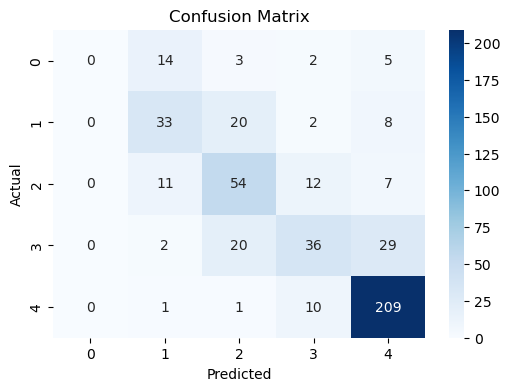

In [70]:
# ----------------------------------------
# c) Evaluate the model performance
# ----------------------------------------

# Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

# # Confusion Matrix
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Classification Report
# print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


***The model performs best for class 4 (209 correct predictions) but struggles with distinguishing between classes 0 and 1, as well as classes 2 and 3, due to significant misclassifications. The overall accuracy of 69.31% suggests moderate performance, with room for improvement in handling class imbalances and reducing confusion between similar classes. Further tuning, such as adjusting class weights or using more discriminative features, may enhance prediction accuracy.***

##### ***Random Forest Predictions***

Accuracy:  0.697286
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.21      0.29        24
           1       0.52      0.40      0.45        63
           2       0.52      0.58      0.55        84
           3       0.59      0.51      0.54        87
           4       0.84      0.95      0.89       221

    accuracy                           0.70       479
   macro avg       0.59      0.53      0.55       479
weighted avg       0.68      0.70      0.68       479



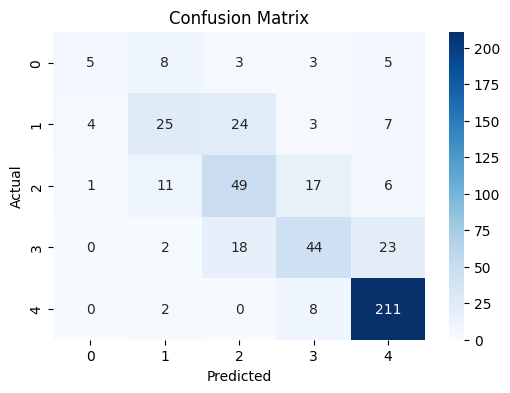

In [26]:
#---------------------------------------------------------------------------------
# c.) Evaluation of model performance, accuracy score and classsification report
#---------------------------------------------------------------------------------

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: 2f}")

print ("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt= 'd', cmap ='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**The Random Forest Classifier achieved an accuracy of 69.73%, which indicates moderate model performance. From the confusion matrix, it's clear that the model performs especially well in predicting class 4, with 211 correct predictions, suggesting this class is the most distinguishable in the dataset. However, the model shows noticeable confusion between other classes, particularly between classes 0 and 1, and classes 2 and 3, where misclassifications occur. This is reflected in the classification report, where precision and recall scores are lower for these classes.**

##### ***XGBoost Predictions***

#### ***D. Feature Importance from the Model***

##### ***Logistic Regression Features***

In [ ]:
# ----------------------------------------
# d) Feature Importance (model coefficients)
# ----------------------------------------

# Get model coefficients and match them to feature names
coefficients = pd.Series(model.coef_[0], index=X_train.columns)

# Sort coefficients by absolute value (importance)
coefficients = coefficients.sort_values(key=abs, ascending=False)

# Print feature importances
print("\nTop Feature Importances:")
print(coefficients)

# Visualize feature importances
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title("Feature Importance (Absolute Coefficients)")
plt.tight_layout()
plt.show()

##### ***Random Forest Features***

             Feature  Importance
5           Absences    0.452782
4    StudyTimeWeekly    0.169921
7    ParentalSupport    0.067837
3  ParentalEducation    0.058261
0                Age    0.056851
2          Ethnicity    0.049508
9             Sports    0.028119
1             Gender    0.027650
6           Tutoring    0.024689
8    Extracurricular    0.023918


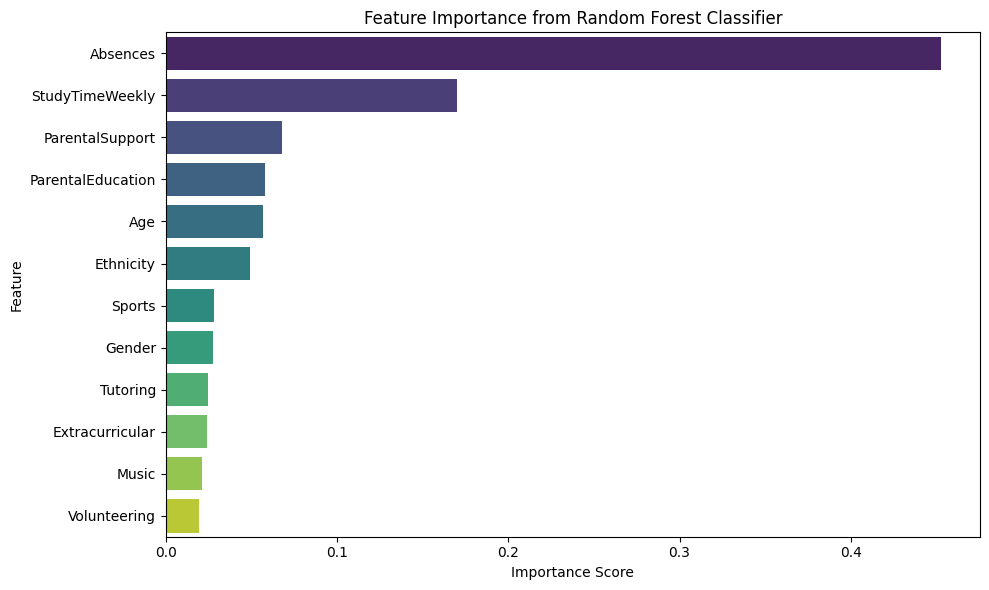

In [34]:
# ----------------------------------------
# d.) Feature Importance 
# ----------------------------------------

#----------------------------------------
#Getting feature importances from model
#----------------------------------------
importances = model.feature_importances_

#------------------------------------------------------------------
#Creates data frame with feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#----------------------
#Displays top features
#----------------------
print(feature_importance_df.head(10))

#---------------------------------------------
#Creates the plot of the feature importances
#---------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



**The Random Forest model showed that features like Study Time Weekly, Parental Education, and Absences were most important in predicting student performance. Less impactful features, such as Gender, Ethnicity, and some Extracurricular Activities, could be removed or combined into broader categories to reduce noise. Feature engineering—like grouping study time or absences into levels—may improve the model’s accuracy and help it better distinguish between grade classes.**

##### ***XGBoost Features***

#### ***E. Cross Validation Models***

#### ***F. Model Choice***

## ***6. Feature Engineering***

## ***7. Improve Model 1***

#### ***A. Build the Model***

#### ***B. Predictions of the Model***

#### ***C. Cross-Validate With Baseline Model***

#### ***D. Create Pickle File***

## ***8. Model 2***

#### ***A. Build the Model***

#### ***B. Predictions of the Model***

#### ***C. Feature Importance from the Model***

#### ***D. Create Pickle File***

## ***9. Cross-Validate Models***

## ***10. Web Application***